In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 
from collections import Counter
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as sk
from scipy.stats import zscore
import jenkspy
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

# Q2:

In [57]:
diabetes=pd.read_csv('Diabetes.csv')
diabetes

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [58]:
dia_col=diabetes.columns
dia_col

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')

In [59]:
diabetes=diabetes.rename(columns={dia_col[0]: "Number of times pregnant",
                                  dia_col[1]: "Plasma glucose concentration a 2 hours in an oral glucose tolerance test" ,
                                  dia_col[2]: "Diastolic blood pressure (mm Hg)",
                                  dia_col[3]: "Triceps skinfold thickness (mm)",
                                 dia_col[4]: "2-Hour serum insulin (mu U/ml)",
                                 dia_col[5]: "body mass index (weight in kg/(height in m)^2)",
                                 dia_col[6]: "Diabetes pedigree function",
                                 dia_col[7]: "Age (year)",
                                 dia_col[8]: "Class variable (0 or 1)"})
diabetes

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (year),Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [60]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  767 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  767 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          767 non-null    int64  
 3   Triceps skinfold thickness (mm)                                           767 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            767 non-null    int64  
 5   body mass index (weight in kg/(height in m)^2)                            767 non-null    float64
 6   Diabetes pedigree function                                         

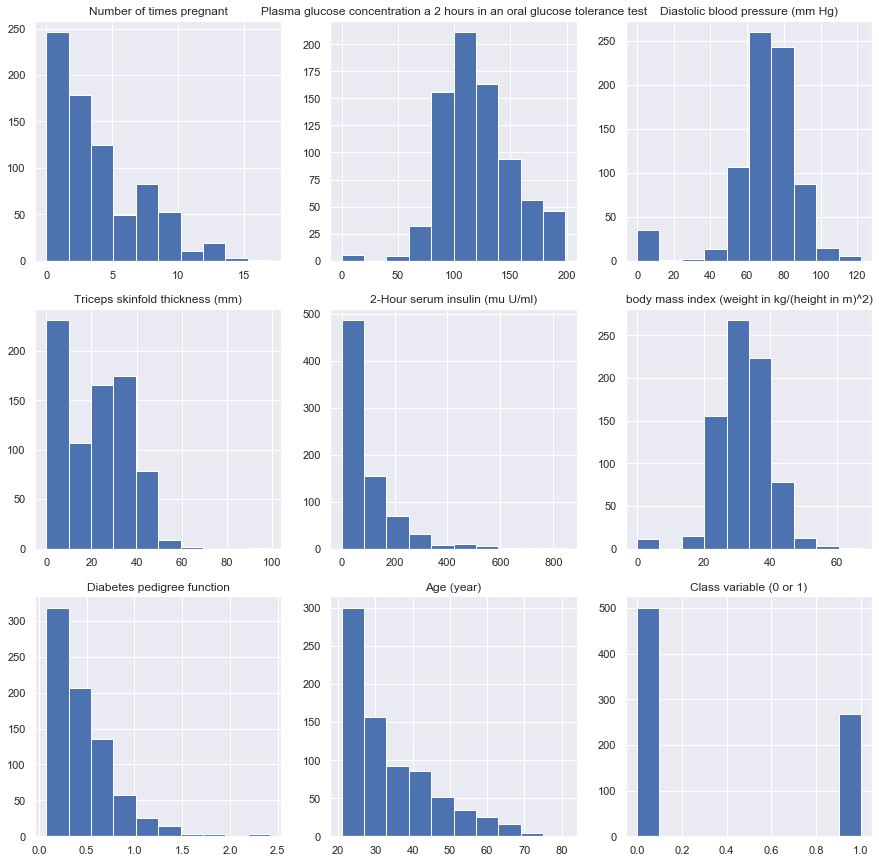

In [61]:
def plot_series(dia_01,row,col,num_of_figs):
    columns=dia_01.columns
    fig, axs = plt.subplots(row,col,figsize=(15,15))
    counter=1
    for i in range(0,row):
        for j in range(0,col):
            if counter>num_of_figs:
                break
            axs[i,j].hist(dia_01.iloc[:,counter-1])
            axs[i,j].set_title(columns[counter-1])
            counter +=1
    plt.show()
plot_series(diabetes,3,3,9)

In [62]:
dia_col=diabetes.columns
for c in dia_col:
    ser2 = diabetes[c]
    #pd.to_numeric(ser2).plot(kind='hist', stacked = True) 
    if c==dia_col[8]:
        continue
    print('sum of Zeros in {} column:\n'.format(c),ser2.eq(0).sum(),
         '\nmax of {} column:\n'.format(c),ser2.max(),
         '\nsum of NAN in {} column:\n'.format(c),ser2.isna().sum(),'\n_-_-_-_-_-\n')

sum of Zeros in Number of times pregnant column:
 111 
max of Number of times pregnant column:
 17 
sum of NAN in Number of times pregnant column:
 0 
_-_-_-_-_-

sum of Zeros in Plasma glucose concentration a 2 hours in an oral glucose tolerance test column:
 5 
max of Plasma glucose concentration a 2 hours in an oral glucose tolerance test column:
 199 
sum of NAN in Plasma glucose concentration a 2 hours in an oral glucose tolerance test column:
 0 
_-_-_-_-_-

sum of Zeros in Diastolic blood pressure (mm Hg) column:
 35 
max of Diastolic blood pressure (mm Hg) column:
 122 
sum of NAN in Diastolic blood pressure (mm Hg) column:
 0 
_-_-_-_-_-

sum of Zeros in Triceps skinfold thickness (mm) column:
 227 
max of Triceps skinfold thickness (mm) column:
 99 
sum of NAN in Triceps skinfold thickness (mm) column:
 0 
_-_-_-_-_-

sum of Zeros in 2-Hour serum insulin (mu U/ml) column:
 373 
max of 2-Hour serum insulin (mu U/ml) column:
 846 
sum of NAN in 2-Hour serum insulin (mu U/ml) co

 i think the zeros in column 2,3,6 are missing data.

In [63]:
m=(pd.to_numeric(diabetes[dia_col[1]]).mean()*diabetes[dia_col[1]].count())/(diabetes[dia_col[1]].count()-diabetes[dia_col[1]].eq(0).sum())
diabetes[dia_col[1]]=diabetes[dia_col[1]].replace({0:m})
m=(pd.to_numeric(diabetes[dia_col[2]]).mean()*diabetes[dia_col[2]].count())/(diabetes[dia_col[2]].count()-diabetes[dia_col[2]].eq(0).sum())
diabetes[dia_col[2]]=diabetes[dia_col[2]].replace({0:m})
m=(pd.to_numeric(diabetes[dia_col[5]]).mean()*diabetes[dia_col[5]].count())/(diabetes[dia_col[5]].count()-diabetes[dia_col[5]].eq(0).sum())
diabetes[dia_col[5]]=diabetes[dia_col[5]].replace({0:m})


In [64]:
dia_col=diabetes.columns
for c in dia_col:
    ser2 = diabetes[c]
    #pd.to_numeric(ser2).plot(kind='hist', stacked = True) 
    if c==dia_col[8]:
        continue
    print('sum of Zeros in {} column:\n'.format(c),ser2.eq(0).sum(),
         '\nmax of {} column:\n'.format(c),ser2.max(),
         '\nsum of NAN in {} column:\n'.format(c),ser2.isna().sum(),'\n_-_-_-_-_-\n')

sum of Zeros in Number of times pregnant column:
 111 
max of Number of times pregnant column:
 17 
sum of NAN in Number of times pregnant column:
 0 
_-_-_-_-_-

sum of Zeros in Plasma glucose concentration a 2 hours in an oral glucose tolerance test column:
 0 
max of Plasma glucose concentration a 2 hours in an oral glucose tolerance test column:
 199.0 
sum of NAN in Plasma glucose concentration a 2 hours in an oral glucose tolerance test column:
 0 
_-_-_-_-_-

sum of Zeros in Diastolic blood pressure (mm Hg) column:
 0 
max of Diastolic blood pressure (mm Hg) column:
 122.0 
sum of NAN in Diastolic blood pressure (mm Hg) column:
 0 
_-_-_-_-_-

sum of Zeros in Triceps skinfold thickness (mm) column:
 227 
max of Triceps skinfold thickness (mm) column:
 99 
sum of NAN in Triceps skinfold thickness (mm) column:
 0 
_-_-_-_-_-

sum of Zeros in 2-Hour serum insulin (mu U/ml) column:
 373 
max of 2-Hour serum insulin (mu U/ml) column:
 846 
sum of NAN in 2-Hour serum insulin (mu U/ml)

In [65]:
dia_norm=diabetes.copy()
dia_y=dia_norm[dia_col[8]]
dia_norm=dia_norm.drop([dia_col[8]],axis=1)
dia_col=dia_norm.columns
dia_col
dia_norm=dia_norm.to_numpy()
dia_norm

array([[1.00e+00, 8.50e+01, 6.60e+01, ..., 2.66e+01, 3.51e-01, 3.10e+01],
       [8.00e+00, 1.83e+02, 6.40e+01, ..., 2.33e+01, 6.72e-01, 3.20e+01],
       [1.00e+00, 8.90e+01, 6.60e+01, ..., 2.81e+01, 1.67e-01, 2.10e+01],
       ...,
       [5.00e+00, 1.21e+02, 7.20e+01, ..., 2.62e+01, 2.45e-01, 3.00e+01],
       [1.00e+00, 1.26e+02, 6.00e+01, ..., 3.01e+01, 3.49e-01, 4.70e+01],
       [1.00e+00, 9.30e+01, 7.00e+01, ..., 3.04e+01, 3.15e-01, 2.30e+01]])

In [66]:
scaler = sk.StandardScaler()
dia_norm=scaler.fit_transform(dia_norm)
dia_norm=pd.DataFrame(dia_norm,columns=dia_col)
dia_norm= pd.concat((dia_norm,dia_y), axis = 1)
dia_norm

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (year),Class variable (0 or 1)
0,-0.843726,-1.204829,-0.529560,0.532023,-0.693559,-0.851771,-0.364265,-0.188940,0
1,1.234240,2.016619,-0.694899,-1.286882,-0.693559,-1.331770,0.604701,-0.103795,1
2,-0.843726,-1.073342,-0.529560,0.155698,0.122357,-0.633591,-0.919684,-1.040393,0
3,-1.140579,0.504511,-2.678971,0.908349,0.764674,1.548219,5.482732,-0.018650,1
4,0.343683,-0.185800,0.131797,-1.286882,-0.693559,-0.997225,-0.817052,-0.274086,0
...,...,...,...,...,...,...,...,...,...
762,1.827945,-0.678879,0.297136,1.723720,0.868833,0.064588,-0.907610,2.535709,0
763,-0.546874,0.011432,-0.198881,0.406582,-0.693559,0.631859,-0.397469,-0.529522,0
764,0.343683,-0.021440,-0.033542,0.155698,0.278596,-0.909953,-0.684235,-0.274086,0
765,-0.843726,0.142920,-1.025578,-1.286882,-0.693559,-0.342683,-0.370302,1.173384,1


In [67]:
dia_col=dia_norm.columns
dia_col
d_train,d_test=train_test_split(dia_norm,test_size=0.2,random_state=7)
d_train

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (year),Class variable (0 or 1)
289,-1.140579,-1.434933,1.289172,0.532023,-0.346361,0.646404,-0.113722,-1.040393,0
328,0.640535,-0.547391,-0.198881,0.720186,-0.103322,-0.240865,-1.055520,0.321931,0
394,-0.546874,0.175791,-1.190917,0.218419,1.693429,-0.691772,3.405946,-0.699812,0
321,-1.140579,0.077176,-0.198881,-0.032464,-0.693559,-0.735408,-0.657067,0.236786,1
326,1.827945,1.885132,-0.198881,-1.286882,-0.693559,0.384587,-0.820071,0.321931,0
...,...,...,...,...,...,...,...,...,...
579,-1.140579,0.964718,1.454512,1.598278,-0.693559,1.402765,-0.303893,-1.040393,1
502,0.937388,-0.908982,-0.694899,0.281140,-0.007843,0.122770,0.803927,0.662512,0
537,-1.140579,0.175791,0.627815,1.033790,1.129232,0.559132,1.003154,-0.870103,0
196,-0.250022,-0.481647,-0.860239,-0.471511,-0.276921,-1.389951,0.622812,-0.870103,1


In [68]:
d_test

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (year),Class variable (0 or 1)
353,-0.250022,-1.040470,0.462476,-1.286882,-0.693559,1.490037,0.263601,-1.040393,0
236,-1.140579,1.885132,1.454512,0.406582,-0.693559,1.693673,0.646961,-0.870103,1
323,-0.546874,-0.317287,0.214467,0.720186,-0.693559,0.471860,-0.977037,-1.040393,0
98,-0.843726,0.011432,1.454512,1.911883,1.216032,2.508215,-0.442748,-0.188940,1
700,0.640535,0.110048,0.462476,0.657465,-0.693559,-0.706318,0.281712,1.343675,1
...,...,...,...,...,...,...,...,...,...
153,1.234240,2.180979,0.462476,-1.286882,-0.693559,2.246398,-1.010242,0.832803,1
392,0.046831,-0.185800,-0.033542,-0.534231,0.061597,-1.506314,-0.026183,0.321931,0
308,-0.546874,0.077176,-0.364221,0.469303,1.085832,0.064588,1.217473,-0.274086,1
70,0.343683,0.570255,-0.694899,0.908349,0.521635,-0.560864,-0.183150,-0.614667,0


In [69]:
dia_y_train=d_train[dia_col[8]]
dia_y_train.value_counts()

0    396
1    217
Name: Class variable (0 or 1), dtype: int64

In [70]:
dia_x_train=d_train.copy()
dia_x_train=dia_x_train.drop([dia_col[8]],axis=1)
dia_x_train.reset_index()

,index,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (year)
0,289,-1.140579,-1.434933,1.289172,0.532023,-0.346361,0.646404,-0.113722,-1.040393
1,328,0.640535,-0.547391,-0.198881,0.720186,-0.103322,-0.240865,-1.055520,0.321931
2,394,-0.546874,0.175791,-1.190917,0.218419,1.693429,-0.691772,3.405946,-0.699812
3,321,-1.140579,0.077176,-0.198881,-0.032464,-0.693559,-0.735408,-0.657067,0.236786
4,326,1.827945,1.885132,-0.198881,-1.286882,-0.693559,0.384587,-0.820071,0.321931
...,...,...,...,...,...,...,...,...,...
608,579,-1.140579,0.964718,1.454512,1.598278,-0.693559,1.402765,-0.303893,-1.040393
609,502,0.937388,-0.908982,-0.694899,0.281140,-0.007843,0.122770,0.803927,0.662512
610,537,-1.140579,0.175791,0.627815,1.033790,1.129232,0.559132,1.003154,-0.870103
611,196,-0.250022,-0.481647,-0.860239,-0.471511,-0.276921,-1.389951,0.622812,-0.870103


In [71]:
dia_y_test=d_test[dia_col[8]]
dia_y_test.value_counts()

0    104
1     50
Name: Class variable (0 or 1), dtype: int64

In [72]:
dia_x_test=d_test.copy()
dia_x_test=dia_x_test.drop([dia_col[8]],axis=1)
dia_x_test.reset_index()

,index,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (year)
0,353,-0.250022,-1.040470,0.462476,-1.286882,-0.693559,1.490037,0.263601,-1.040393
1,236,-1.140579,1.885132,1.454512,0.406582,-0.693559,1.693673,0.646961,-0.870103
2,323,-0.546874,-0.317287,0.214467,0.720186,-0.693559,0.471860,-0.977037,-1.040393
3,98,-0.843726,0.011432,1.454512,1.911883,1.216032,2.508215,-0.442748,-0.188940
4,700,0.640535,0.110048,0.462476,0.657465,-0.693559,-0.706318,0.281712,1.343675
...,...,...,...,...,...,...,...,...,...
149,153,1.234240,2.180979,0.462476,-1.286882,-0.693559,2.246398,-1.010242,0.832803
150,392,0.046831,-0.185800,-0.033542,-0.534231,0.061597,-1.506314,-0.026183,0.321931
151,308,-0.546874,0.077176,-0.364221,0.469303,1.085832,0.064588,1.217473,-0.274086
152,70,0.343683,0.570255,-0.694899,0.908349,0.521635,-0.560864,-0.183150,-0.614667


In [73]:
model = RandomForestClassifier(criterion='entropy',n_estimators=100,max_depth = 5, random_state=0)
model.fit(dia_x_train, dia_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [74]:
dia_y_predict=model.predict(dia_x_test)

In [75]:
accuracy_score(dia_y_test,dia_y_predict)

0.7987012987012987

seems like max_depth=5 or 10... has the max accuracy.
if we we must test the depth to find the most efficient depth , increasing or redusing the depth may increase or reduse the accuracy.